1. GENERATE 100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
all with the same population mean. Include a Normal, a Poisson, a Binomial, a Chi-Squared distribution, and 1 more of your choice.
2. For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well).
3. Describe the behavior you see in the plots in terms of the law of large numbers.
4. PLOT the distributions of all sample means (together for all distributions). Mandatory: as a histogram. Optional: in any other way you think is convincing 
5. Extra Credit: FIT a gaussian to the distribution of means

In [28]:
from __future__ import print_function
__author__= 'Franz Loza'

import pylab as pl
# this package sets up pretty plots
#import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np

%pylab inline

#Seaborn not working in python 2 or 3

Populating the interactive namespace from numpy and matplotlib


<function matplotlib.pyplot.show>

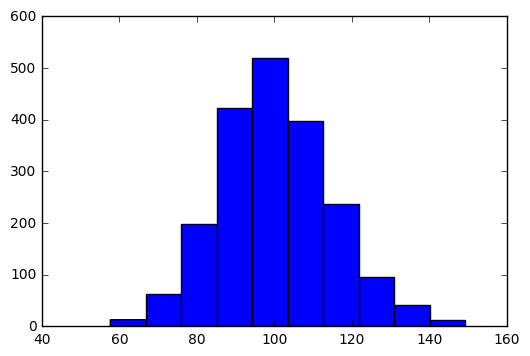

In [13]:
#LAB
#np.random.chisquare?

#choose the same mean for all distribution
#chi: mean is the same of degrees of freedom

np.random.seed(999)
chisq = np.random.chisquare(100,2000)
#chisq

pl.hist(chisq)
pl.show
'''
get the mean for a 100 distributions 
put in for loop
'''

In [15]:
mysize = (2000/np.array(range(1,101)))
mysize

array([2000, 1000,  666,  500,  400,  333,  285,  250,  222,  200,  181,
        166,  153,  142,  133,  125,  117,  111,  105,  100,   95,   90,
         86,   83,   80,   76,   74,   71,   68,   66,   64,   62,   60,
         58,   57,   55,   54,   52,   51,   50,   48,   47,   46,   45,
         44,   43,   42,   41,   40,   40,   39,   38,   37,   37,   36,
         35,   35,   34,   33,   33,   32,   32,   31,   31,   30,   30,
         29,   29,   28,   28,   28,   27,   27,   27,   26,   26,   25,
         25,   25,   25,   24,   24,   24,   23,   23,   23,   22,   22,
         22,   22,   21,   21,   21,   21,   21,   20,   20,   20,   20,
         20])

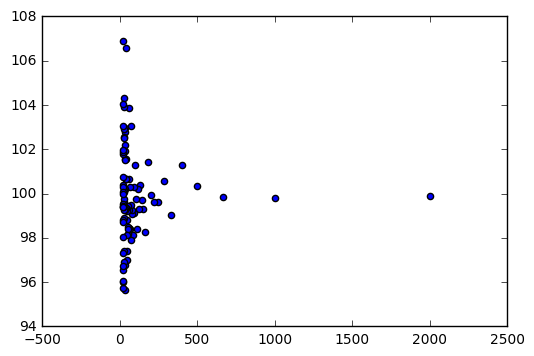

In [21]:
#create empty list
chidist =[]
for i in range (0,len(mysize)):
    chidist.append(np.random.chisquare(100,mysize[i]))
#plot mean of distribution
#x-axis = mysize

#extract means first
chimeans=[]
for i in range(0,len(mysize)):
    chimeans.append(chidist[i].mean())

#chimeans
#plot gains the sizes

pl.scatter(mysize,chimeans)

#something to the sq of n, preferred


Chisq mean: 98.81, standard deviation: 14.61


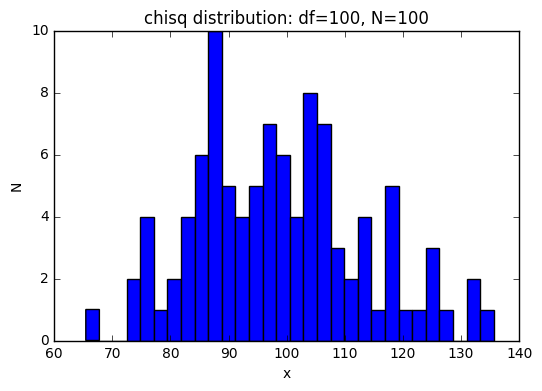

In [29]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']
dist = 'chisq'
mymean = 100
dfsize = 100
nsize  = 100

# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

md = {}
# md is an empty dictionary
md[dist] = np.random.chisquare(df, size=dfsize)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md[dist], bins = 30)
pl.ylabel('N')
pl.xlabel('x')
pl.title(dist + ' distribution: df=' + str(dfsize) + ', N=' + str(nsize))

print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

In [45]:
mysize = (2000 / (np.array(range(1, 101)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20   20] (100,)


## Chi Square Distribution

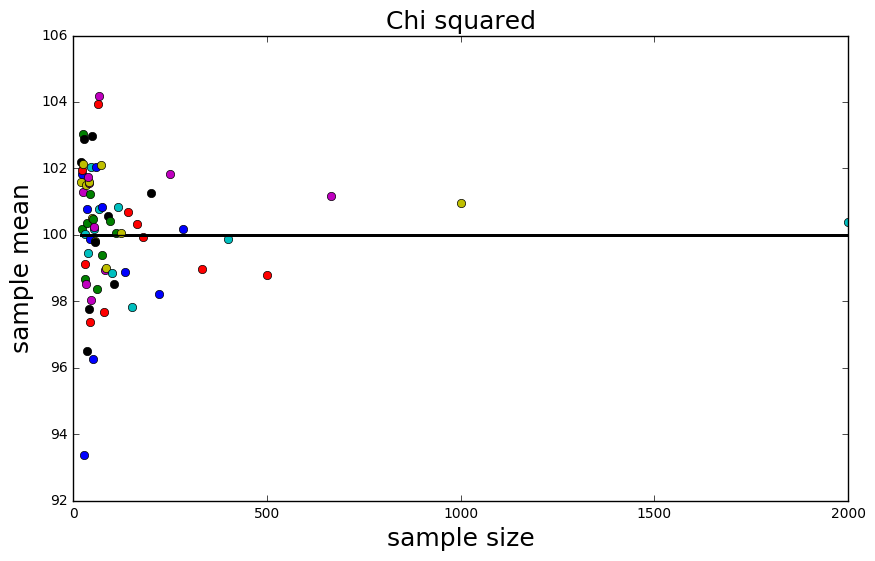

In [46]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']
mymean = 100
dfsize = 100
nsize  = 100

# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

md = {}
# md is an empty dictionary
md[dist] = np.random.chisquare(df, size=dfsize)

#Plot the sample mean (dependent var.) against the sample size N (independent var.)
md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable
for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

In [ ]:
#Describe the behavior you see in the plots in terms of the law of large numbers.

## Normal distribution

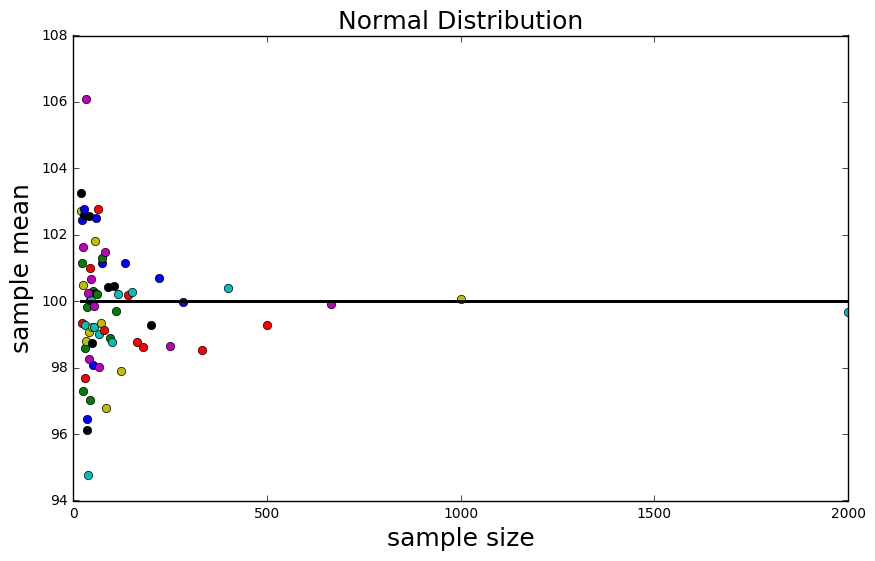

In [34]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['lnorm']
mymean = 100
dfsize = 100
nsize  = 100

# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
#print (mysize, mysize.shape)

#Plot the sample mean (dependent var.) against the sample size N (independent var.)
md['lnorm'] = {} 

#and do it in a for loop. not pythonic, but easily readable
for n in mysize:
    md['lnorm'][n] = np.random.normal(df, size = n)
    
# save the means for plotting later    

md['lnorm']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['lnorm']:
    if not type(nn) == str:
        md['lnorm']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['lnorm']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Normal Distribution', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

## Poisson distribution

In [39]:
np.random.poisson?

In [40]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
dist = 'pois'
distributions = [dist]
mymean = 100
dfsize = 100
nsize  = 100
#lam = ??

# 
df = mymean

#Plot the sample mean (dependent var.) against the sample size N (independent var.)
md[dist] = {} 

#and do it in a for loop. not pythonic, but easily readable
for n in mysize:
    md[dist][n] = np.random.poisson(lam, size = n)
    
# save the means for plotting later    

md[dist]['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md[dist]:
    if not type(nn) == str:
        md[dist]['means'][nn] = md[dist][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md[dist]['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Poisson', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

SyntaxError: invalid syntax (<ipython-input-40-7f5049fcafca>, line 7)

## Binomial distribution

In [37]:
np.random.binomial?

AttributeError: 'int' object has no attribute 'mean'

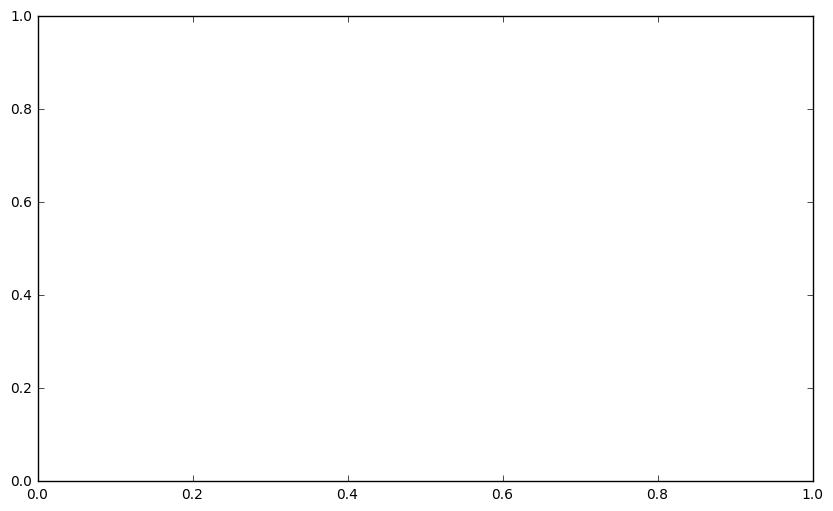

In [38]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
dist = 'binomial'
distributions = [dist]
mymean = 100
dfsize = 100
nsize  = 100
n = 100
p = .5
# 
df = mymean

mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
#print (mysize, mysize.shape)

#Plot the sample mean (dependent var.) against the sample size N (independent var.)
md[dist] = {} 

#and do it in a for loop. not pythonic, but easily readable
for n in mysize:
    md[dist][n] = np.random.binomial(n,p, size = None)
    
# save the means for plotting later    

md[dist]['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md[dist]:
    if not type(nn) == str:
        md[dist]['means'][nn] = md[dist][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md[dist]['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Binomial', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

In [ ]:
#Other

In [ ]:
#PLOT the distributions of all sample means (together for all distributions
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

In [ ]:
#Extra Credit: FIT a gaussian to the distribution of means